<a href="https://colab.research.google.com/github/ChanceCollins99/Physics-Lab/blob/main/Physics_Lab_4_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'\n#-----------------------------------------------------------------------#\n#----------UPDATE THIS SECTION!!!----------\n\n#DATA TO BE PLOTTED\n#UPDATE THE VARIABLE NAMES & NUMBERS (LEAVE BRACKETS/PARENTHESES AS IS)\n#variable names should start with a letter and must contain only letters, numbers, and underscores\n\n\nln_r_mid = np.array([0.22,0.56,0.81,1.01,1.18,1.32,1.45,1.56,1.66,1.75,1.83,1.91])\n\nln_E = np.array([1.69,1.44,1.29,1.02,0.67,0.92,0.77,0.20,0.31,0.34,0.04,0.20])\n\nln_E_error = np.array([0.04, 0.04,0.12,0.06,0.05,0.11,0.07,0.03,0.04,0.03,0.01,0.03])\n\n\n\n#Re-assign variables as x, y, dy so that the remaining plotting code may remain generic\n#UPDATE VARIABLE NAMES (ON RHS OF EACH EQUAL SIGN) TO MATCH VARIABLE NAMES FOR DATA ABOVE\n\nx = ln_r_mid             #this should be the array you want to plot on the x axis\ny = ln_E             #this should be the array you want to plot on the y axis\ndy = ln_E_error        #this should be your error in y array\n\n\n#UPDAT

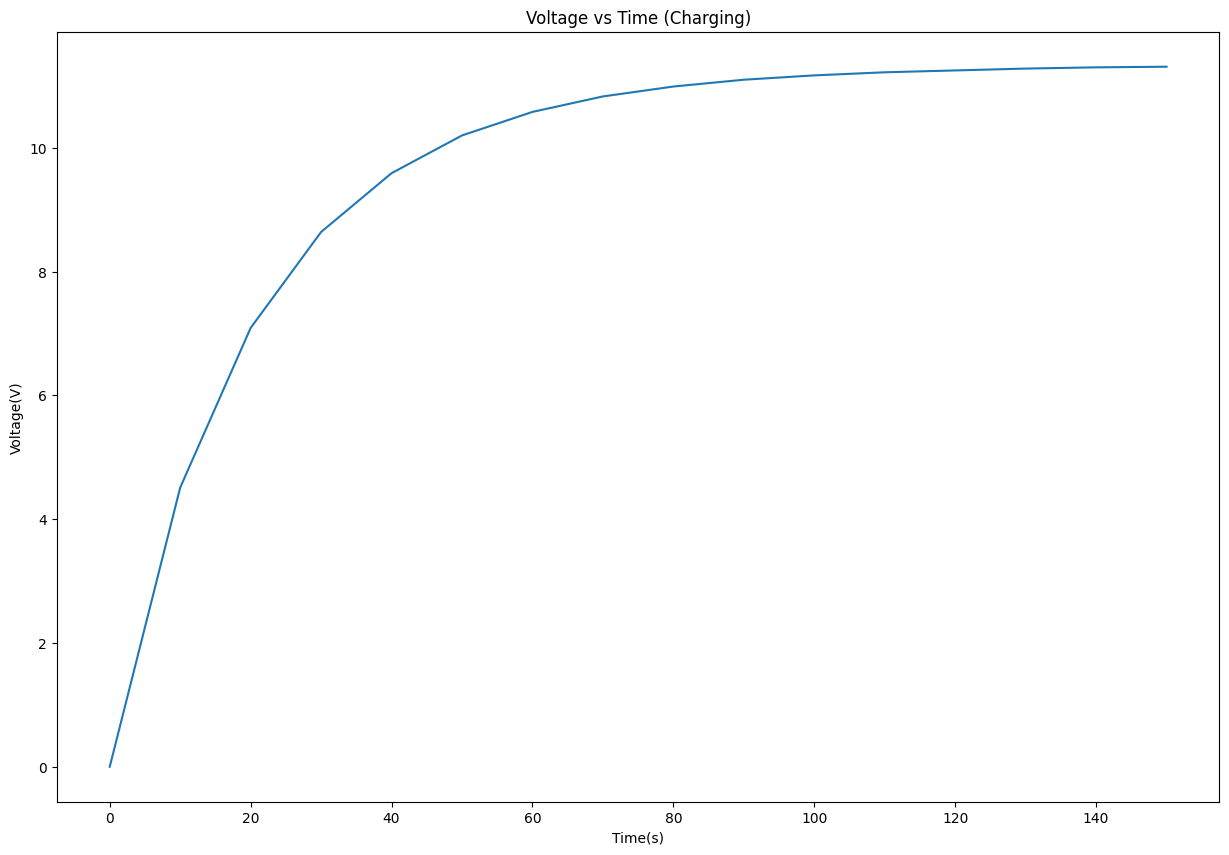

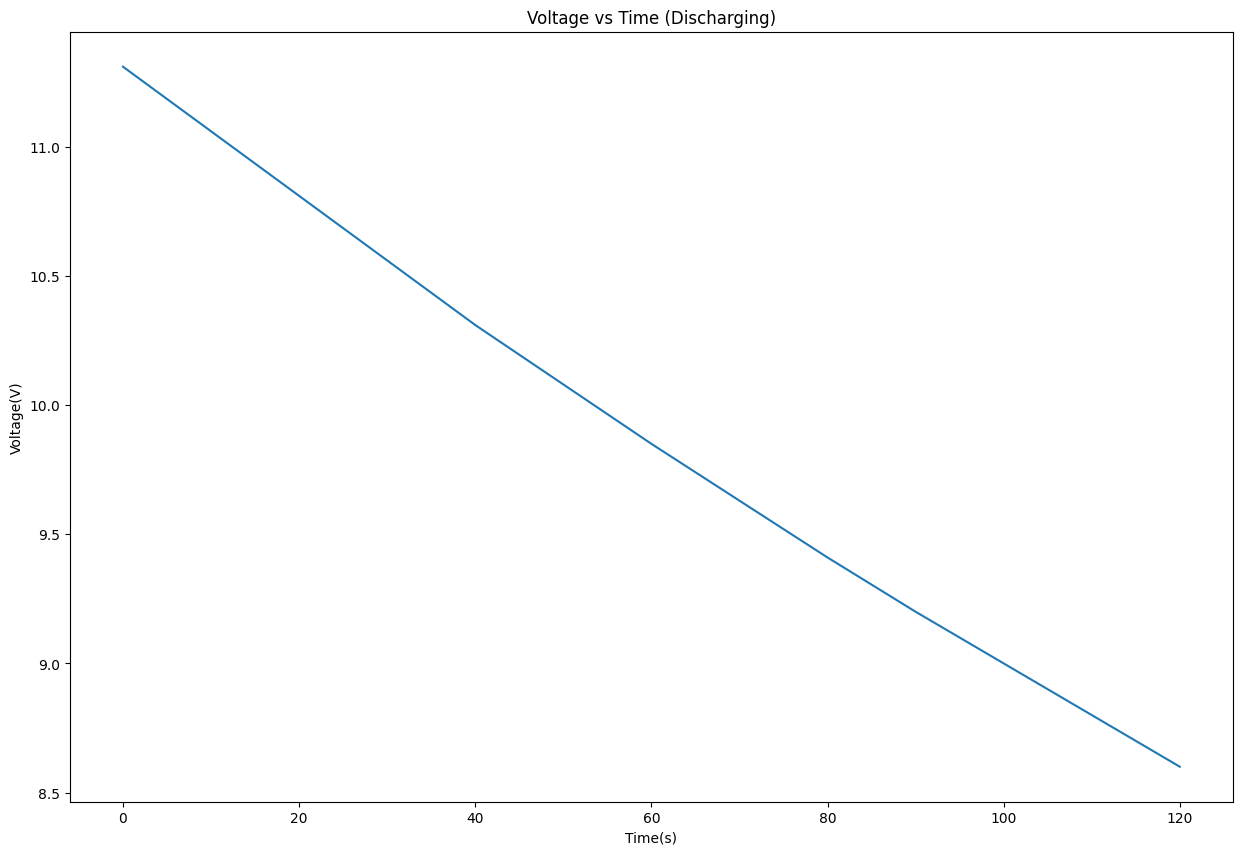

In [12]:
#PHSX 216 & 218 plotting code
#Brianna Beller
#Updated September 2023

#import packages and libraries, assign shortcut names
%matplotlib inline
from __future__ import division #only used if running python 2
import numpy as np
import matplotlib.pyplot as plt
V = np.array([0,4.51,7.09,8.64,9.59,10.2,10.58,10.83,10.99,11.1,11.17,11.22,11.25,11.28,11.3,11.31]) # fill in these data arrays
t = np.array([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.figure(figsize=(15,10))
plt.plot(t,V)

plt.xlabel("Time(s)")
plt.ylabel("Voltage(V)")
plt.title("Voltage vs Time (Charging)")

V2 = np.array([11.31,11.06,10.81,10.56,10.31,10.08,9.85,9.63,9.41,9.2,9,8.8,8.6]) # fill in these data arrays
t2 = np.array([0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.figure(figsize=(15,10))
plt.plot(t2,V2)

plt.xlabel("Time(s)")
plt.ylabel("Voltage(V)")
plt.title("Voltage vs Time (Discharging)")


"""
#-----------------------------------------------------------------------#
#----------UPDATE THIS SECTION!!!----------

#DATA TO BE PLOTTED
#UPDATE THE VARIABLE NAMES & NUMBERS (LEAVE BRACKETS/PARENTHESES AS IS)
#variable names should start with a letter and must contain only letters, numbers, and underscores


ln_r_mid = np.array([0.22,0.56,0.81,1.01,1.18,1.32,1.45,1.56,1.66,1.75,1.83,1.91])

ln_E = np.array([1.69,1.44,1.29,1.02,0.67,0.92,0.77,0.20,0.31,0.34,0.04,0.20])

ln_E_error = np.array([0.04, 0.04,0.12,0.06,0.05,0.11,0.07,0.03,0.04,0.03,0.01,0.03])



#Re-assign variables as x, y, dy so that the remaining plotting code may remain generic
#UPDATE VARIABLE NAMES (ON RHS OF EACH EQUAL SIGN) TO MATCH VARIABLE NAMES FOR DATA ABOVE

x = ln_r_mid             #this should be the array you want to plot on the x axis
y = ln_E             #this should be the array you want to plot on the y axis
dy = ln_E_error        #this should be your error in y array


#UPDATE EACH OF THESE 4 STRINGS FOR YOUR PLOT LABELS AS YOU WANT THEM TO APPEAR

plot_title= 'Charge Over Distance'
x_label= 'ln(r_mid/r_0) (cm)'
y_label= 'ln(E/E_0) (V/cm)'
slope_units= 'V/cm^2'

#UPDATE ANNOTATION PLACEMENT SO IT'S OUT OF WAY OF PLOTTED DATA AND BEST FIT LINE
#integer from 1 to 4, top R corner is 1 (counter-clockwise from there)

annotation_placement=1


#-----------------------------------------------------------------------#
#-----DON'T NEED TO CHANGE ANYTHING BEYOND THIS POINT!!!-----


#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D

D=Delta(x, dy)

dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" using linear least squares fitting
#(value close to number of plotted points indicates good fit)
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N

N = LLSFD2(x,y,dy)

#assign annotation positions based on annotation_placement value
if annotation_placement==2 or annotation_placement==3:
    xpos=0.05
elif annotation_placement==1 or annotation_placement==4:
    xpos=0.75

if annotation_placement==1 or annotation_placement==2:
    ypos=[.9,.85,.8,.75]
elif annotation_placement==3 or annotation_placement==4:
    ypos=[.2,.15,.1,.05]

#-----------------------------------------------------------------------#
#Don't need to change anything in this section!

#Plot data on graph. Plot error bars and place values for slope,
#error in slope, and vertical intercept (plus error) on the plot using "annotate"

plt.figure(figsize=(15,10))

plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)

plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars

plt.annotate('Slope ({}) = {value:.{digits}E}'.format(slope_units,value=m, digits=3),
             (xpos, ypos[0]), xycoords='axes fraction')

plt.annotate('Error in Slope ({}) = {value:.{digits}E}'.format(slope_units,value=dm, digits=3),
             (xpos, ypos[1]), xycoords='axes fraction')

plt.annotate('Vertical intercept = {value:.{digits}E}'.format(value=b, digits=3),
             (xpos, ypos[2]), xycoords='axes fraction')

plt.annotate('Error in vertical intercept = {value:.{digits}E}'.format(value=db, digits=3),
             (xpos, ypos[3]), xycoords='axes fraction')

plt.show()
"""